In [1]:
import os
import pandas as pd
import numpy as np

data_dir = "../data"
raw_dataset_filename = "mxmh_survey_results.csv"
raw_dataset_file = os.path.join(data_dir, raw_dataset_filename)
dataset_raw_df = pd.read_csv(raw_dataset_file)

In [2]:
print(dataset_raw_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [3]:
for col in dataset_raw_df.columns:
    print(col, dataset_raw_df[col].unique())

Timestamp ['8/27/2022 19:29:02' '8/27/2022 19:57:31' '8/27/2022 21:28:18'
 '8/27/2022 21:40:40' '8/27/2022 21:54:47' '8/27/2022 21:56:50'
 '8/27/2022 22:00:29' '8/27/2022 22:18:59' '8/27/2022 22:33:05'
 '8/27/2022 22:44:03' '8/27/2022 22:51:15' '8/27/2022 23:00:32'
 '8/27/2022 23:04:00' '8/27/2022 23:12:03' '8/27/2022 23:16:06'
 '8/27/2022 23:19:52' '8/27/2022 23:39:41' '8/27/2022 23:39:49'
 '8/27/2022 23:40:55' '8/27/2022 23:41:36' '8/27/2022 23:43:06'
 '8/28/2022 0:28:02' '8/28/2022 1:39:02' '8/28/2022 3:19:08'
 '8/28/2022 4:13:11' '8/28/2022 4:38:14' '8/28/2022 4:40:36'
 '8/28/2022 5:05:51' '8/28/2022 5:16:30' '8/28/2022 8:36:27'
 '8/28/2022 10:30:22' '8/28/2022 10:38:05' '8/28/2022 10:54:30'
 '8/28/2022 10:59:53' '8/28/2022 11:08:51' '8/28/2022 11:13:25'
 '8/28/2022 11:25:49' '8/28/2022 11:27:15' '8/28/2022 11:36:35'
 '8/28/2022 11:39:21' '8/28/2022 11:50:31' '8/28/2022 11:54:45'
 '8/28/2022 11:55:54' '8/28/2022 11:58:48' '8/28/2022 12:08:29'
 '8/28/2022 12:12:35' '8/28/2022 12:15:

Drop Permissions, Timestamp, NA Rows


In [4]:
original_cols = dataset_raw_df.columns.tolist()
edited_cols = [col.lower().replace(" ", "_").replace("[","").replace("]","") for col in original_cols]
dataset_raw_df.columns = edited_cols


In [5]:
cols_to_drop = ["permissions", "timestamp"]
dataset_raw_df.drop(columns=cols_to_drop, inplace=True)
dataset_raw_df.dropna(inplace=True)

In [6]:
dataset_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 616 entries, 2 to 735
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         616 non-null    float64
 1   primary_streaming_service   616 non-null    object 
 2   hours_per_day               616 non-null    float64
 3   while_working               616 non-null    object 
 4   instrumentalist             616 non-null    object 
 5   composer                    616 non-null    object 
 6   fav_genre                   616 non-null    object 
 7   exploratory                 616 non-null    object 
 8   foreign_languages           616 non-null    object 
 9   bpm                         616 non-null    float64
 10  frequency_classical         616 non-null    object 
 11  frequency_country           616 non-null    object 
 12  frequency_edm               616 non-null    object 
 13  frequency_folk              616 non-null

In [7]:
import matplotlib.pyplot as plt
def plot_scatter_plot(df, x_col, y_col):
    plt.figure(figsize=(8, 8), dpi=80)
    plt.scatter(df[x_col], df[y_col])
    plt.title(f"Scatter Plot of {x_col} vs {y_col}")
    plt.show()

def plot_hist(df, x_col):
    plt.figure(figsize=(8, 8), dpi=80)
    plt.hist(df[x_col])
    plt.title(f"Histogram Plot of {x_col}")
    plt.show()

def plot_bar(df, x_col):
    
    plt.figure(figsize=(8, 8), dpi=80)
    plt.bar(df[x_col])
    plt.title(f"Bar Plot of {x_col}")
    plt.show()

def plot_box(df, x_col):
    plt.figure(figsize=(10, 8), dpi=80)
    plt.boxplot(df[x_col])
    plt.title(f"Box Plot of {x_col}")
    plt.show()

In [8]:
dataset_raw_df["frequency_classical"].value_counts()

frequency_classical
Rarely             223
Sometimes          168
Never              139
Very frequently     86
Name: count, dtype: int64

<BarContainer object of 4 artists>

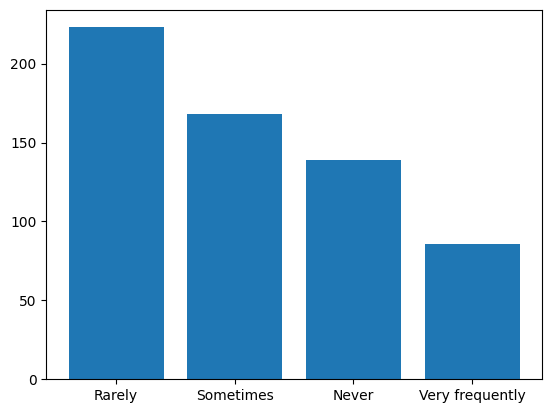

In [9]:
plt.bar(dataset_raw_df["frequency_classical"].value_counts().index, dataset_raw_df["frequency_classical"].value_counts())

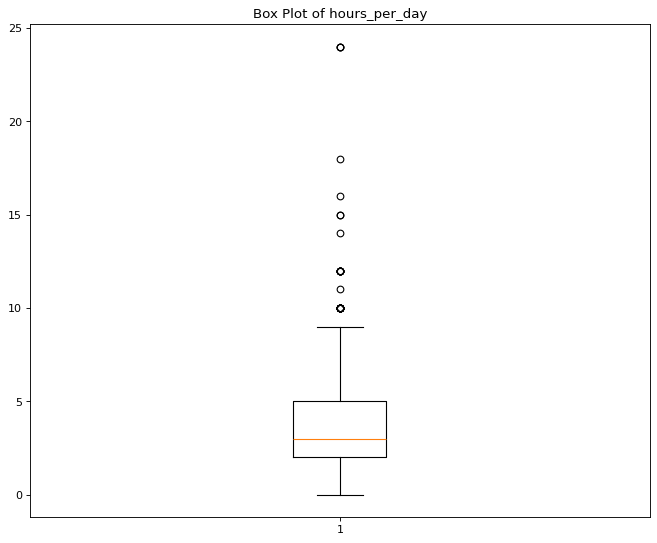

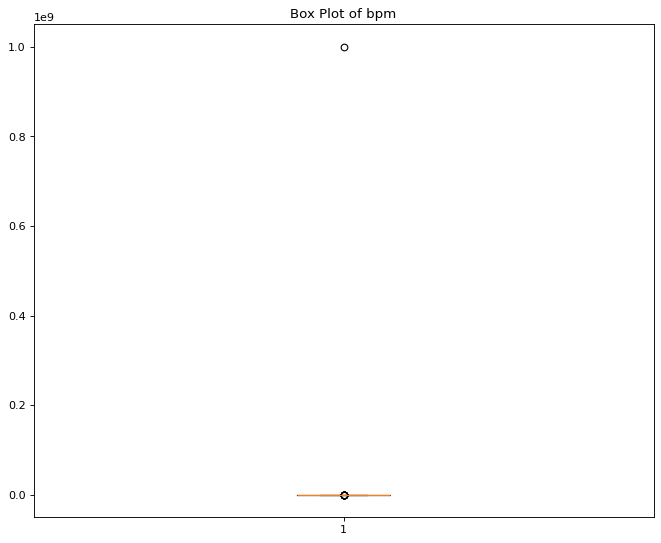

In [10]:
plot_box(dataset_raw_df, "hours_per_day")
plot_box(dataset_raw_df, "bpm")


In [11]:
plot_bar(dataset_raw_df, "frequency_classical")

TypeError: bar() missing 1 required positional argument: 'height'

<Figure size 640x640 with 0 Axes>

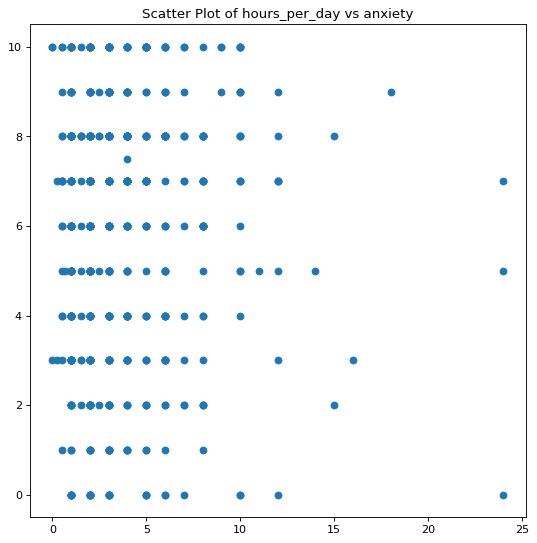

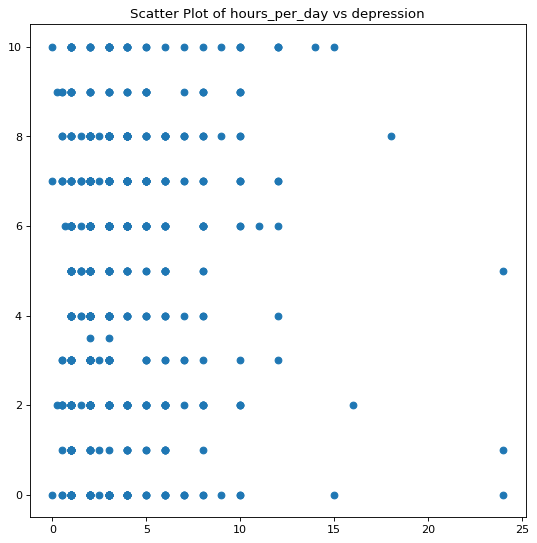

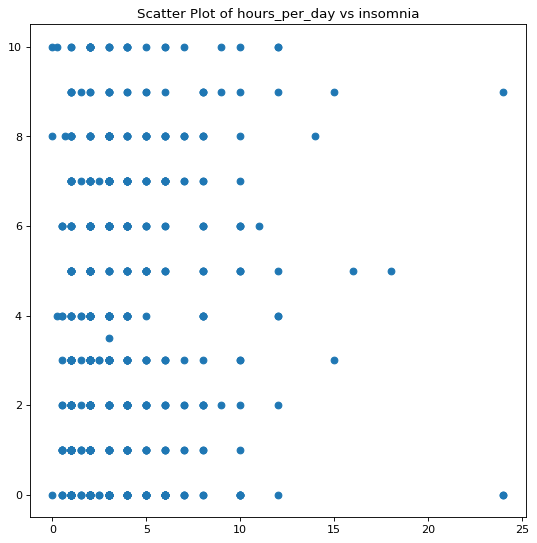

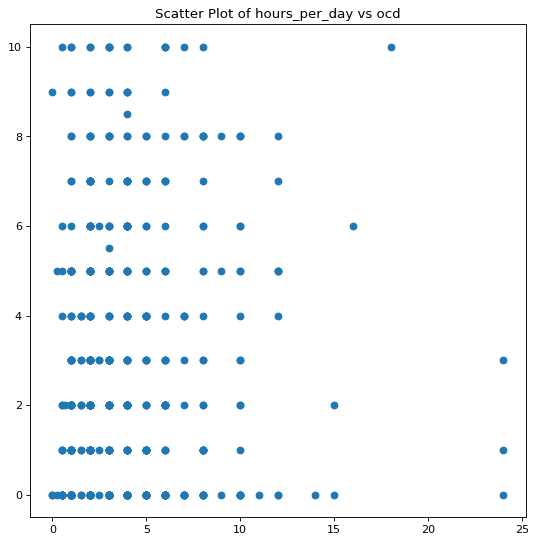

In [12]:
plot_scatter_plot(dataset_raw_df, "hours_per_day", "anxiety")
plot_scatter_plot(dataset_raw_df, "hours_per_day", "depression")
plot_scatter_plot(dataset_raw_df, "hours_per_day", "insomnia")
plot_scatter_plot(dataset_raw_df, "hours_per_day", "ocd")

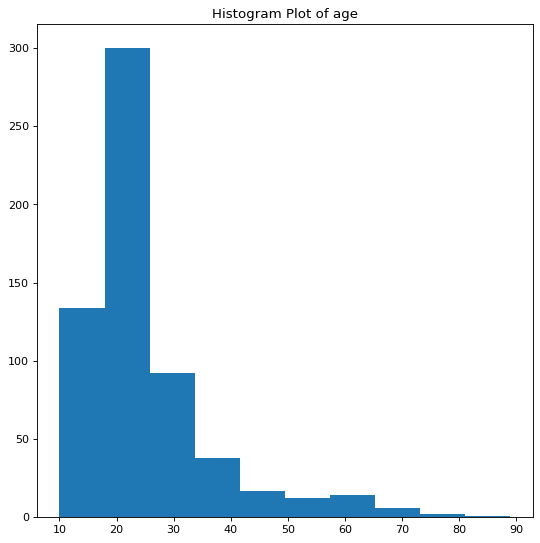

In [13]:
plot_hist(dataset_raw_df, "age")

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

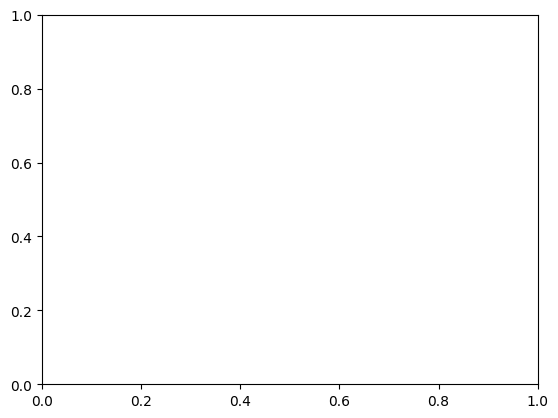

In [14]:
plt.boxplot(dataset_raw_df[["frequency_classical", "anxiety"]])

In [15]:
dataset_raw_df.columns

Index(['age', 'primary_streaming_service', 'hours_per_day', 'while_working',
       'instrumentalist', 'composer', 'fav_genre', 'exploratory',
       'foreign_languages', 'bpm', 'frequency_classical', 'frequency_country',
       'frequency_edm', 'frequency_folk', 'frequency_gospel',
       'frequency_hip_hop', 'frequency_jazz', 'frequency_k_pop',
       'frequency_latin', 'frequency_lofi', 'frequency_metal', 'frequency_pop',
       'frequency_r&b', 'frequency_rap', 'frequency_rock',
       'frequency_video_game_music', 'anxiety', 'depression', 'insomnia',
       'ocd', 'music_effects'],
      dtype='object')

In [16]:
dataset_raw_df.frequency_classical.unique().tolist()

['Never', 'Sometimes', 'Rarely', 'Very frequently']

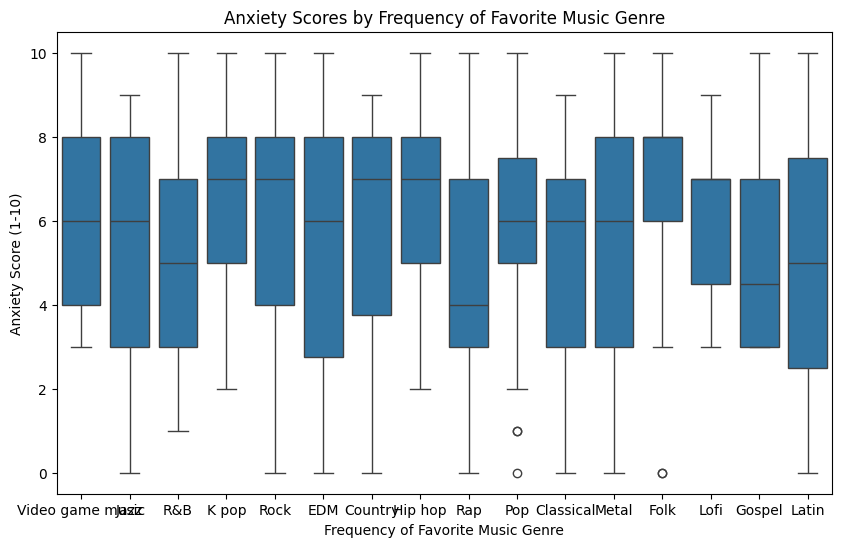

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is called 'df'

box_column = "fav_genre"
# Set the order of categories for the frequency of genre column
freq_order = dataset_raw_df[box_column].unique().tolist() #['Never', 'Rarely', 'Sometimes', 'Very frequently']

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=box_column, y='anxiety', data=dataset_raw_df, order=freq_order)

# Add labels and title
plt.title('Anxiety Scores by Frequency of Favorite Music Genre')
plt.xlabel('Frequency of Favorite Music Genre')
plt.ylabel('Anxiety Score (1-10)')

# Show the plot
plt.show()


In [21]:
import plotly.express as px
import pandas as pd
df = pd.DataFrame(dict(
    r=[1, 5, 2, 2, 3],
    theta=['processing cost','mechanical properties','chemical stability',
           'thermal stability', 'device integration']))

fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.show()

In [20]:
df

,r,theta
0,1,processing cost
1,5,mechanical properties
2,2,chemical stability
3,2,thermal stability
4,3,device integration


In [25]:
dataset_raw_df.columns

Index(['age', 'primary_streaming_service', 'hours_per_day', 'while_working',
       'instrumentalist', 'composer', 'fav_genre', 'exploratory',
       'foreign_languages', 'bpm', 'frequency_classical', 'frequency_country',
       'frequency_edm', 'frequency_folk', 'frequency_gospel',
       'frequency_hip_hop', 'frequency_jazz', 'frequency_k_pop',
       'frequency_latin', 'frequency_lofi', 'frequency_metal', 'frequency_pop',
       'frequency_r&b', 'frequency_rap', 'frequency_rock',
       'frequency_video_game_music', 'anxiety', 'depression', 'insomnia',
       'ocd', 'music_effects'],
      dtype='object')

In [73]:
fav_genre_disease_avg = dataset_raw_df.groupby(by=['fav_genre']).agg({'anxiety':'mean', 'depression':'mean', 'insomnia':'mean',
       'ocd':'mean'})
fav_genre_disease_avg.reset_index(drop=False, inplace=True)
top_n_flag = True
n = 5
if top_n_flag:
       top_n_genres = dataset_raw_df["fav_genre"].value_counts()[:n].index.tolist()
       fav_genre_disease_avg = fav_genre_disease_avg.loc[fav_genre_disease_avg.fav_genre.isin(top_n_genres)]
fav_genre_disease_avg = fav_genre_disease_avg.melt(id_vars='fav_genre', var_name='genre')
fav_genre_disease_avg
fig = px.line_polar(fav_genre_disease_avg, r='value', theta='genre', line_close=True, color='fav_genre',
                    title=f'Radar Plot of Fav Genre {n if top_n_flag else ""}')
fig.show()

In [49]:
dataset_raw_df.agg({'anxiety':'mean', 'depression':'mean', 'insomnia':'mean',
       'ocd':'mean'})

anxiety       5.883929
depression    4.894481
insomnia      3.801136
ocd           2.659091
dtype: float64

['Rock', 'Pop', 'Metal', 'Classical', 'Video game music']

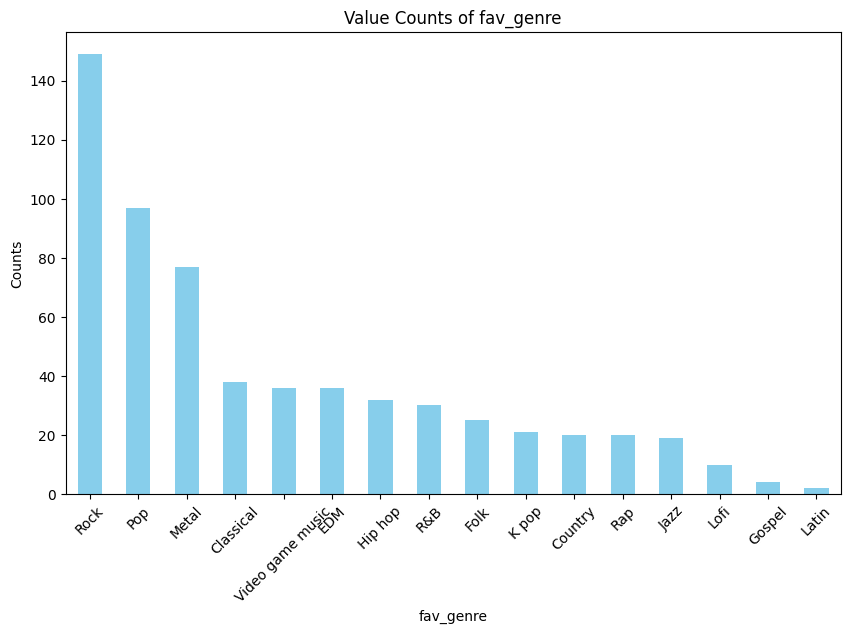

In [54]:
# Specify the column for which you want to plot the value counts
column_name = 'fav_genre'

# Get the value counts of the column
value_counts = dataset_raw_df[column_name].value_counts()

# Plot the bar plot
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Value Counts of {}'.format(column_name))
plt.xlabel(column_name)
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

In [45]:
combined_counts = pd.DataFrame()
freq_genres_cols = ['frequency_country',
       'frequency_edm', 'frequency_folk', 'frequency_gospel',
       'frequency_hip_hop', 'frequency_jazz', 'frequency_k_pop',
       'frequency_latin', 'frequency_lofi', 'frequency_metal', 'frequency_pop',
       'frequency_r&b', 'frequency_rap', 'frequency_rock',
       'frequency_video_game_music']
# Loop through each column
for col in freq_genres_cols:
    # Get value counts of the current column
    counts = dataset_raw_df[col].value_counts().sort_index()
    
    # Add the counts as a new column in the combined_counts DataFrame
    combined_counts[col] = counts
combined_counts.index.name = "category"
combined_counts.reset_index(drop=False, inplace=True)
combined_counts
df_long = combined_counts.melt(id_vars='category', var_name='genre')
df_long

,category,genre,value
0,Never,frequency_country,290
1,Rarely,frequency_country,189
2,Sometimes,frequency_country,95
3,Very frequently,frequency_country,42
4,Never,frequency_edm,249
5,Rarely,frequency_edm,160
6,Sometimes,frequency_edm,122
7,Very frequently,frequency_edm,85
8,Never,frequency_folk,243
9,Rarely,frequency_folk,183


In [41]:
fig = px.line_polar(df_long, r='value', theta='genre', line_close=True, color='category',
                    title='Radar Plot of Frequency by Genre')
fig.show()

In [ ]:
fig = px.line_polar(, r='r', theta='theta', line_close=True)
fig.show()